In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [109]:
titanic_data = pd.read_csv('C:/Users/pc/Desktop/titanic/tested.csv')

In [110]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [111]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [112]:
titanic_data.shape

(418, 12)

In [114]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [113]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [115]:
def bar_chart(feature):
    survived = titanic_data[titanic_data['Survived']==1][feature].value_counts()
    dead = titanic_data[titanic_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True ,figsize=(10,5))

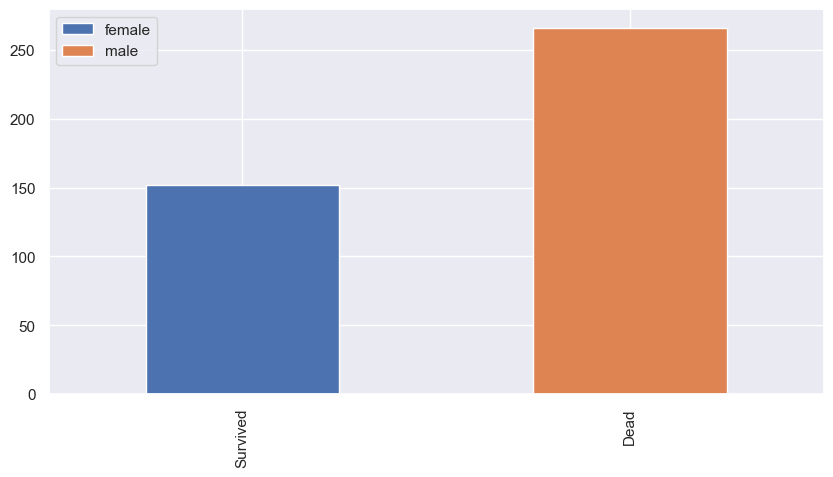

In [14]:
bar_chart('Sex')

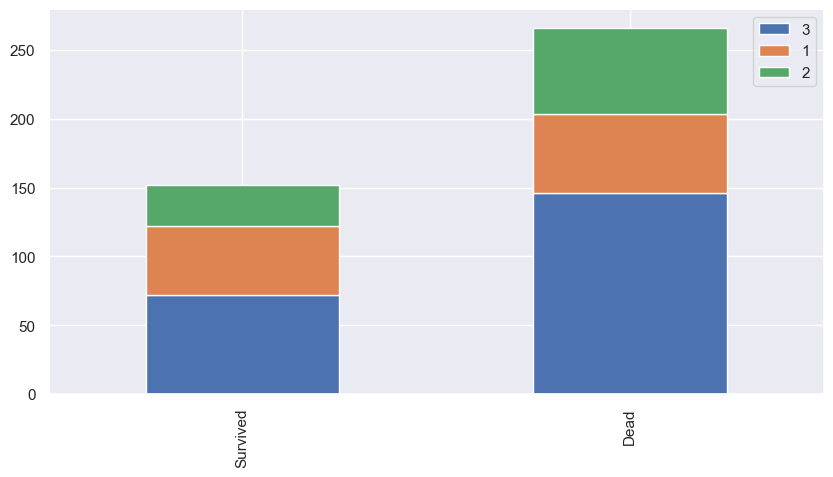

In [116]:
bar_chart('Pclass')

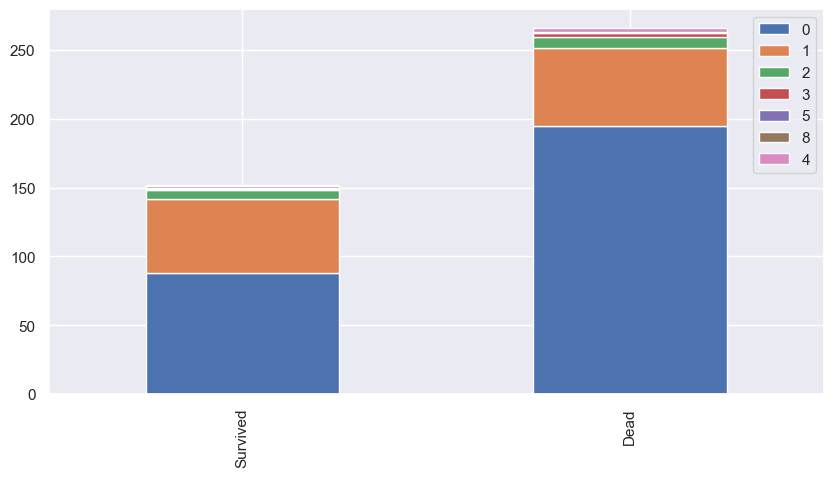

In [117]:
bar_chart('SibSp')

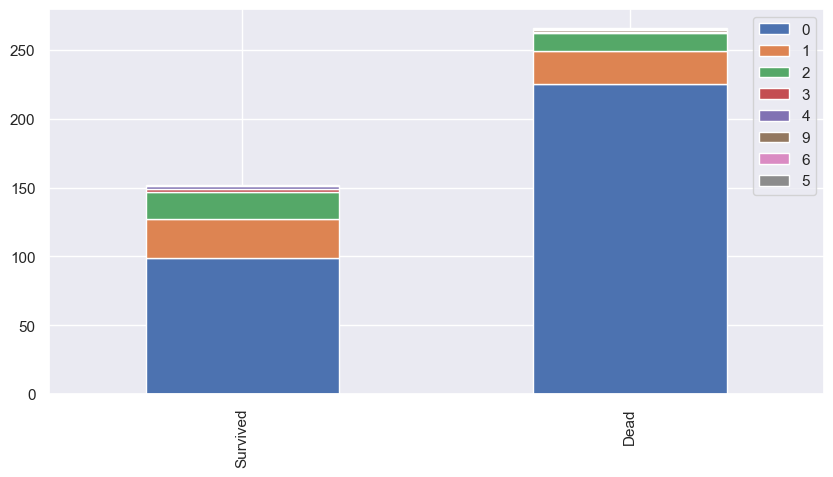

In [118]:
bar_chart('Parch')

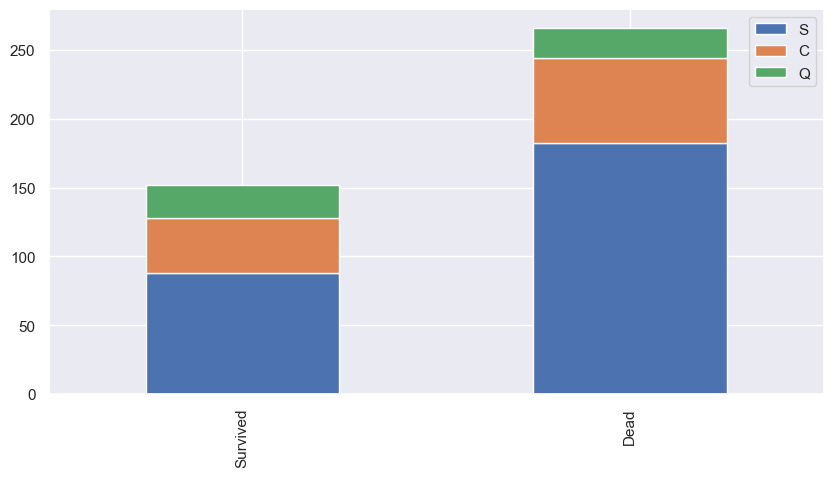

In [119]:
bar_chart('Embarked')

In [120]:
train_titanic_data = [titanic_data]
for dataset in train_titanic_data :
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [121]:
titanic_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [122]:
title_mapping = {"Mr" :0, "Miss":1,"Mrs":2,"Master":3,"Col":3,"Rev":3,"Ms":3,"Dr":3,"Dona":3}
for dataset in train_titanic_data :
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [123]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


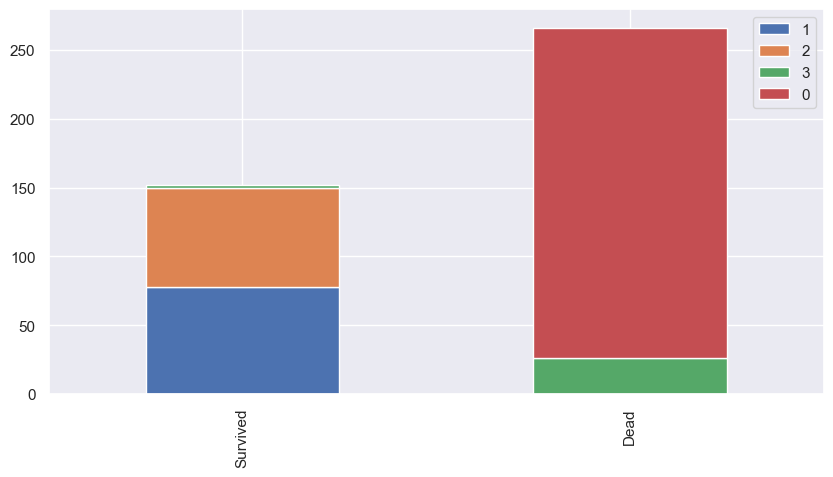

In [129]:
bar_chart('Title')

In [132]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [133]:
sex_mapping = {"male":0 , "female":1}
for dataset in train_titanic_data:
    dataset['Sex']= dataset['Sex'].map(sex_mapping)

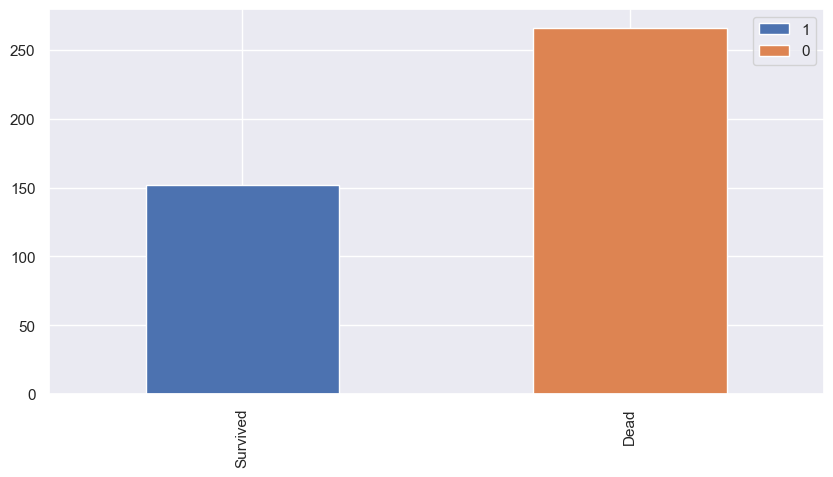

In [134]:
bar_chart('Sex')

In [135]:
titanic_data["Age"].fillna(titanic_data.groupby("Title")["Age"].transform("median"),inplace = True)

In [136]:
titanic_data.head(30)
titanic_data.groupby("Title")["Age"].transform("median")

0      28.5
1      36.5
2      28.5
3      28.5
4      36.5
       ... 
413    28.5
414    10.0
415    28.5
416    28.5
417    10.0
Name: Age, Length: 418, dtype: float64

In [137]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

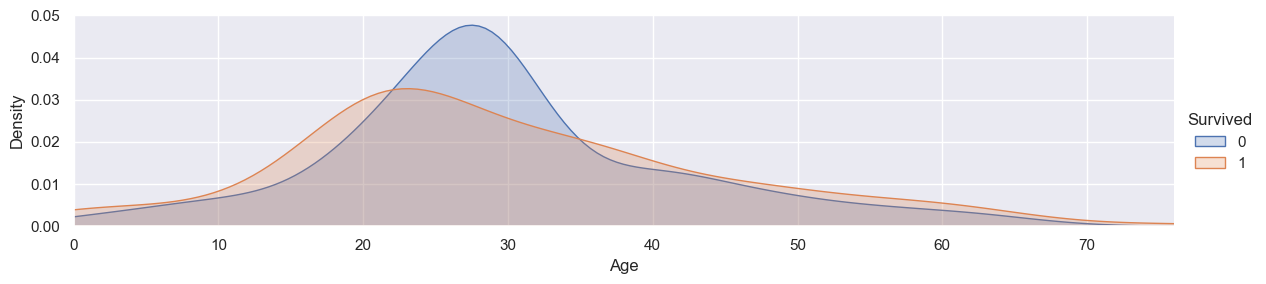

In [138]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_data['Age'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

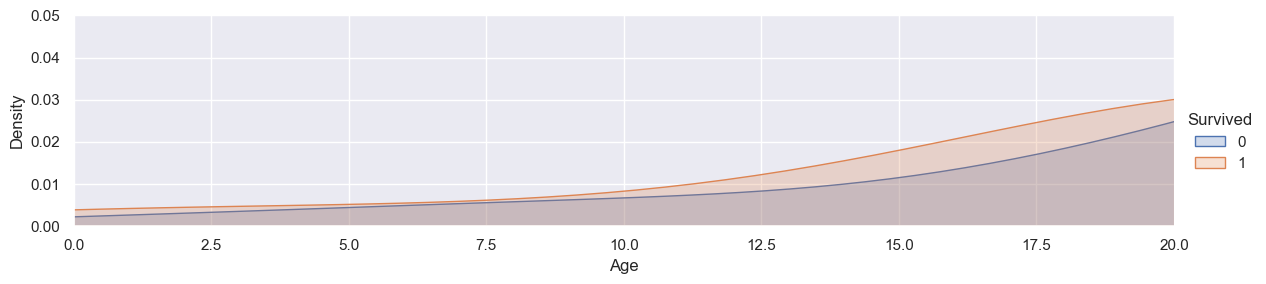

In [139]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_data['Age'].max()))
facet.add_legend()

plt.xlim(0,20)

(20.0, 30.0)

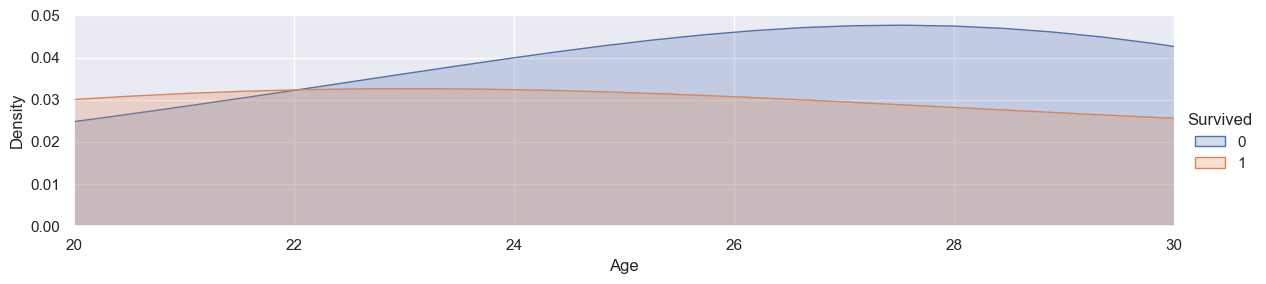

In [140]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_data['Age'].max()))
facet.add_legend()

plt.xlim(20,30)

(30.0, 40.0)

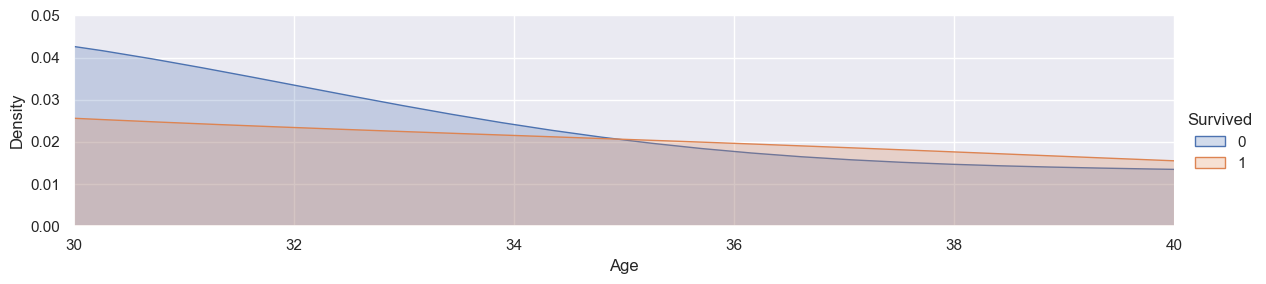

In [141]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,titanic_data['Age'].max()))
facet.add_legend()

plt.xlim(30,40)

In [142]:
for dataset in train_titanic_data:
    dataset.loc[ dataset['Age'] <=16 , 'Age'] = 0
    dataset.loc[ (dataset['Age'] >16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[ (dataset['Age'] >26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[ (dataset['Age'] >36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] >62 , 'Age'] = 4


In [143]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


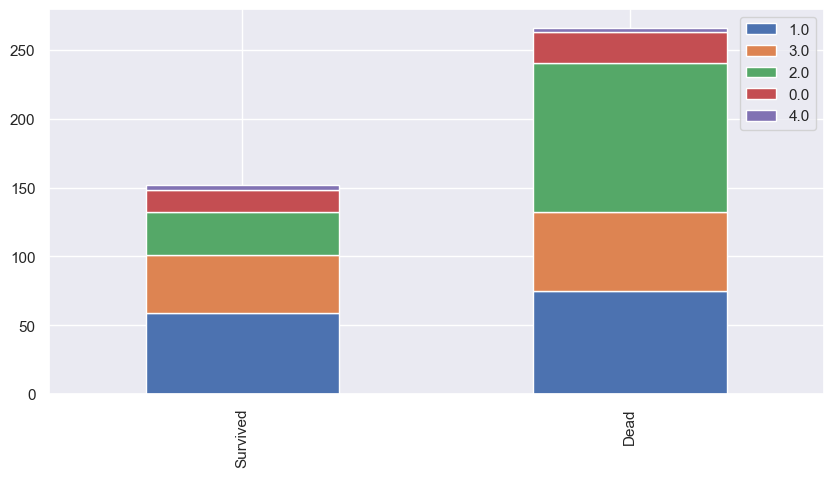

In [144]:
bar_chart('Age')

# Embarked 
## filling missing values

<AxesSubplot:>

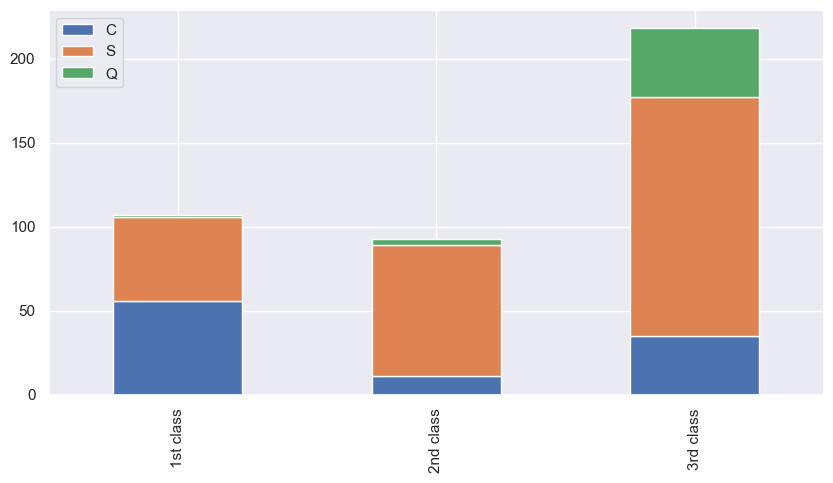

In [145]:
Pclass1 = titanic_data[titanic_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic_data[titanic_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic_data[titanic_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [146]:
for dataset in train_titanic_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [147]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,0,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,1,3.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,0,3.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,0,2.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,1,1.0,1,1,3101298,12.2875,NaN,S,2


In [148]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [149]:
embarked_mapping = {"S":0,"C":1,"Q":2}
for dataset in train_titanic_data:
    dataset['Embarked']= dataset['Embarked'].map(embarked_mapping)

In [150]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,1,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,0,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,0,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,1,3,1,1.0,1,1,3101298,12.2875,NaN,0,2


# Fare

In [151]:
titanic_data["Fare"].fillna(titanic_data.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [152]:
titanic_data.head(60)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,0,2.0,0,0,330911,7.8292,NaN,2,0
1,893,1,3,1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,0,2,0,3.0,0,0,240276,9.6875,NaN,2,0
3,895,0,3,0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,1,3,1,1.0,1,1,3101298,12.2875,NaN,0,2
5,897,0,3,0,0.0,0,0,7538,9.2250,NaN,0,0
6,898,1,3,1,2.0,0,0,330972,7.6292,NaN,2,1
7,899,0,2,0,1.0,1,1,248738,29.0000,NaN,0,0
8,900,1,3,1,1.0,0,0,2657,7.2292,NaN,1,2
9,901,0,3,0,1.0,2,0,A/4 48871,24.1500,NaN,0,0


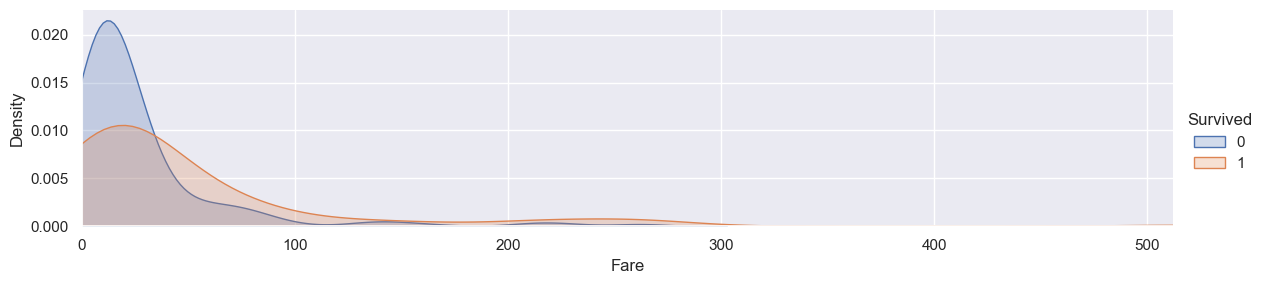

In [153]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,titanic_data['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

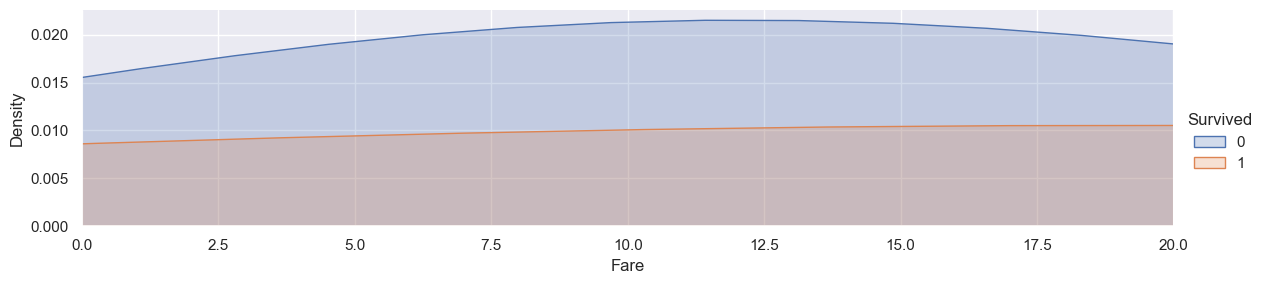

In [154]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,titanic_data['Fare'].max()))
facet.add_legend()

plt.xlim(0,20)

(0.0, 30.0)

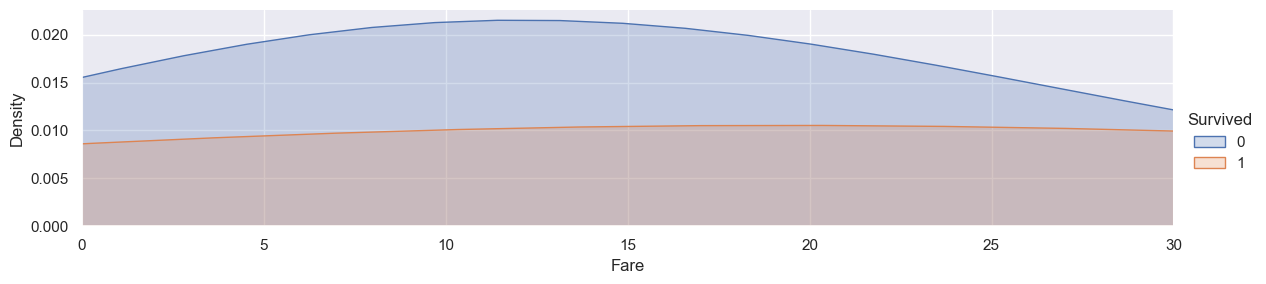

In [155]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,titanic_data['Fare'].max()))
facet.add_legend()

plt.xlim(0,30)

(0.0, 512.3292)

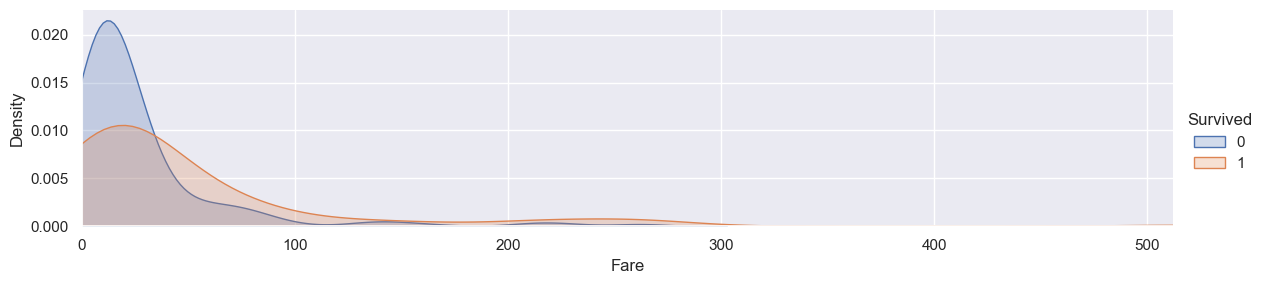

In [156]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,titanic_data['Fare'].max()))
facet.add_legend()

plt.xlim(0)

In [157]:
for dataset in train_titanic_data:
    dataset.loc[ dataset['Fare'] <= 17 , 'Fare'] = 0
    dataset.loc[ (dataset['Fare'] >17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[ (dataset['Fare'] >30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100 , 'Fare'] = 3


In [158]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,0,3,0,2.0,0,0,330911,0.0,NaN,2,0
1,893,1,3,1,3.0,1,0,363272,0.0,NaN,0,2
2,894,0,2,0,3.0,0,0,240276,0.0,NaN,2,0
3,895,0,3,0,2.0,0,0,315154,0.0,NaN,0,0
4,896,1,3,1,1.0,1,1,3101298,0.0,NaN,0,2


# Cabin

In [159]:
titanic_data.Cabin.value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [160]:
for dataset in train_titanic_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

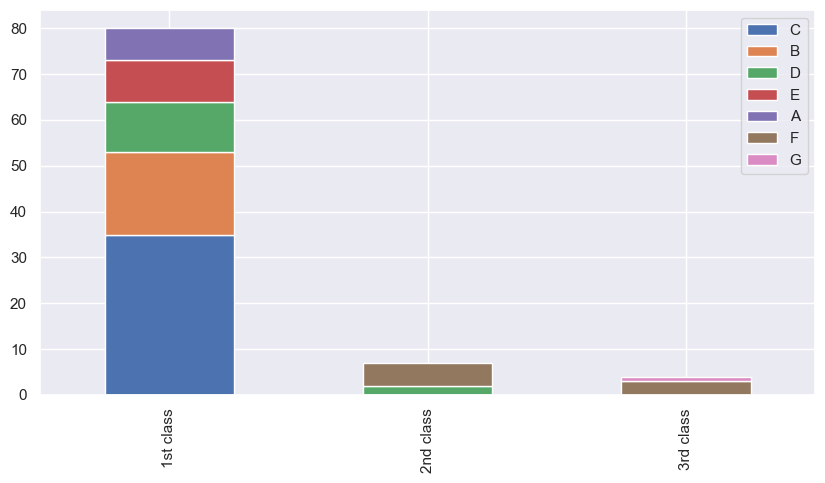

In [161]:
Pclass1= titanic_data[titanic_data['Pclass']==1]['Cabin'].value_counts()
Pclass2= titanic_data[titanic_data['Pclass']==2]['Cabin'].value_counts()
Pclass3= titanic_data[titanic_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind ='bar' ,stacked=True ,figsize=(10,5))

In [162]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_titanic_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [163]:
titanic_data["Cabin"].fillna(titanic_data.groupby("Pclass")['Cabin'].transform("median"),inplace=True)

In [164]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

In [165]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    float64
 10  Embarked     418 non-null    int64  
 11  Title        418 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 39.3+ KB


# FamilySize


In [166]:
titanic_data["FamilySize"] = titanic_data["SibSp"] + titanic_data["Parch"]+1

(0.0, 11.0)

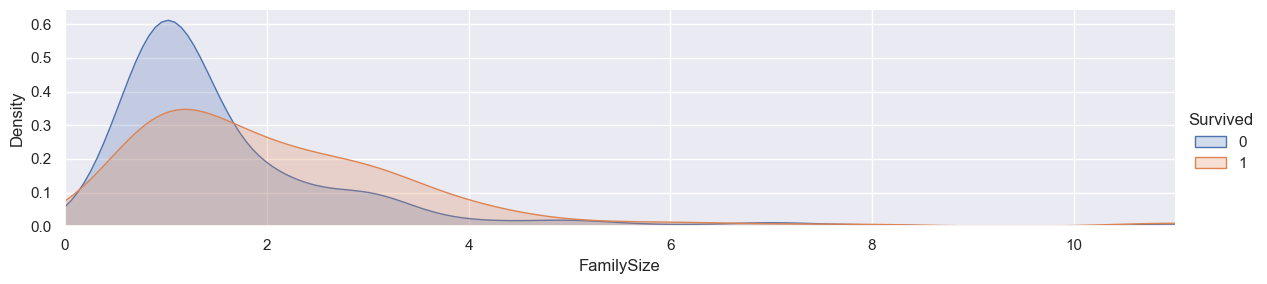

In [167]:
facet = sns.FacetGrid(titanic_data, hue="Survived" , aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,titanic_data['FamilySize'].max()))
facet.add_legend()

plt.xlim(0)

In [169]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6 , 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6,11:4}
for dataset in train_titanic_data:
    dataset["FamilySize"] = dataset['FamilySize'].map(family_mapping)

In [170]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,0,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,1,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,0,2,0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,0,3,0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,1,3,1,1.0,1,1,3101298,0.0,2.0,0,2,0.8


In [173]:
features_drop = ['Ticket','SibSp','Parch']
titanic_data = titanic_data.drop(features_drop,axis=1)


In [174]:
train_data = titanic_data.drop('Survived',axis=1)
target = titanic_data['Survived']

train_data.shape,target.shape

((418, 9), (418,))

In [175]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,0,3,0,2.0,0.0,2.0,2,0,0.0
1,893,1,3,1,3.0,0.0,2.0,0,2,0.4
2,894,0,2,0,3.0,0.0,2.0,2,0,0.0
3,895,0,3,0,2.0,0.0,2.0,0,0,0.0
4,896,1,3,1,1.0,0.0,2.0,0,2,0.8
5,897,0,3,0,0.0,0.0,2.0,0,0,0.0
6,898,1,3,1,2.0,0.0,2.0,2,1,0.0
7,899,0,2,0,1.0,1.0,2.0,0,0,0.8
8,900,1,3,1,1.0,0.0,2.0,1,2,0.0
9,901,0,3,0,1.0,1.0,2.0,0,0,0.8


# Modelling

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [185]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   Cabin        418 non-null    float64
 7   Embarked     418 non-null    int64  
 8   Title        418 non-null    int64  
 9   FamilySize   418 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 32.8 KB


# Cross Validation (K-fold)

In [186]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True ,random_state=0)

# kNN

In [198]:
import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=FutureWarning, module='sklearn')

clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.47619048 0.54761905 0.54761905 0.57142857 0.61904762 0.61904762
 0.64285714 0.64285714 0.56097561 0.68292683]


In [199]:
round(np.mean(score)*100,2)

59.11

# Decision Tree

In [189]:

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [95]:
round(np.mean(score)*100,2)

100.0

# Random Forest

In [96]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [190]:
round(np.mean(score)*100,2)

100.0

# Naive Bayes 

In [191]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [101]:
round(np.mean(score)*100,2)

100.0

# SVM

In [102]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[1.         1.         1.         1.         1.         1.
 1.         1.         0.97560976 1.        ]


In [192]:
round(np.mean(score)*100,2)

100.0

# Testing

In [194]:
clf = SVC()
clf.fit(train_data,target)

test_data = titanic_data.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

In [195]:
submission = pd.DataFrame({
    "PassengerId" : titanic_data["PassengerId"],
    "Survived":prediction
})
submission.to_csv('submission.csv',index=False)

In [197]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
